In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
import os
import numpy as np
import pandas as pd
from matplotlib import style
from matplotlib import pyplot as plt

os.chdir('/content/drive/ml_directory/recommend_this/juice_recommender/')

style.use('ggplot')
pd.options.display.float_format = "{:.3f}".format

In [15]:
my_juice_df = pd.read_csv('juice_dataset.csv')
my_juice_df.columns = ["fid", "juice_name", "cold", "soar_throats", "fever"]
my_juice_df.head()

,fid,juice_name,cold,soar_throats,fever
0,1,Rock The Beet Juice,0,0,1
1,2,Turmeric Sunrise juice,0,0,1
2,3,Lemon Drop juice,0,0,1
3,4,Fennel to the Metal juice,0,0,1
4,5,Dragon Blood juice,0,0,1


In [16]:
my_juice_df.describe()

,fid,cold,soar_throats,fever
count,66.000,66.000,66.000,66.000
mean,33.500,0.515,0.409,0.379
std,19.196,0.504,0.495,0.489
min,1.000,0.000,0.000,0.000
25%,17.250,0.000,0.000,0.000
50%,33.500,1.000,0.000,0.000
75%,49.750,1.000,1.000,1.000
max,66.000,1.000,1.000,1.000


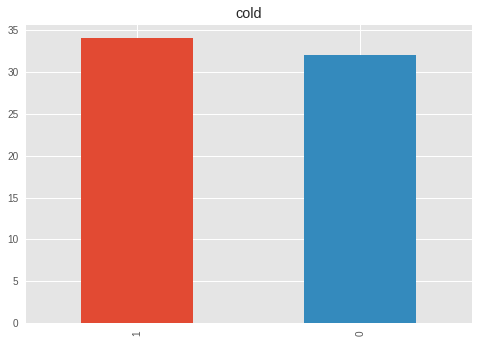

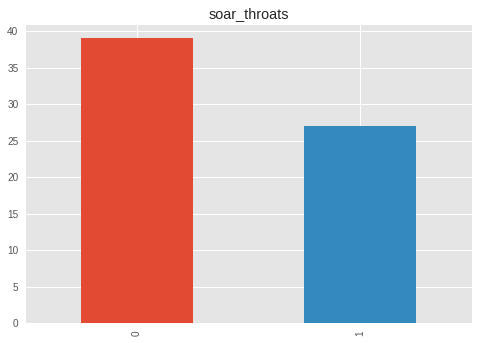

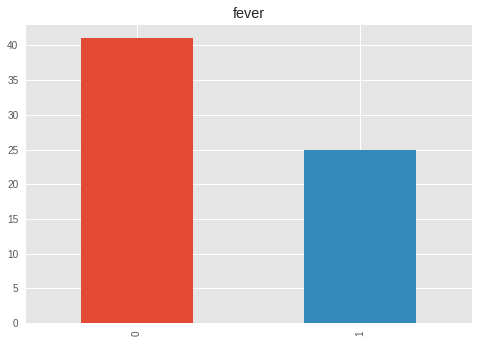

In [49]:
for i in ["cold", "soar_throats", "fever"]:
  pd.value_counts(my_juice_df["{}".format(i)]).plot.bar(title="{}".format(i))
  plt.show()

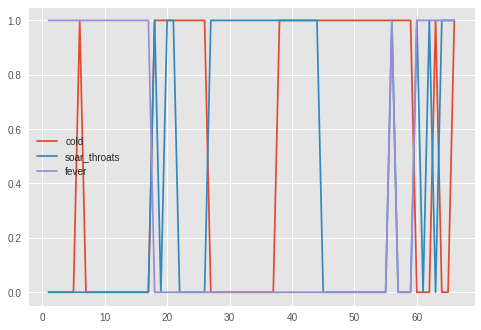

In [48]:
for i in ["cold", "soar_throats", "fever"]:
  plt.plot(my_juice_df.fid, my_juice_df["{}".format(i)], label="{}".format(i))
plt.legend()
plt.show()